# Assignment 1: Sampling and Reproducibility

The code at the end of this file explores contact tracing data about an outbreak of the flu, and demonstrates the dangers of incomplete and non-random samples. This assignment is modified from [Contact tracing can give a biased sample of COVID-19 cases](https://andrewwhitby.com/2020/11/24/contact-tracing-biased/) by Andrew Whitby.

Examine the code below. Identify all stages at which sampling is occurring in the model. Describe in words the sampling procedure, referencing the functions used, sample size, sampling frame, any underlying distributions involved. 


> Sampling happens at the very beginning of the code if this was a real collected dataset: as we are interested in people attending weddings and brunches, we are already sampling only a subset of the population, ergo, those that have family/friends getting married, and in the economic bracket for brunch (these conditions not extensive, but paints a picture of the sampling here), and with more samples from wedding-goers than brunchers. This is the overall sampling frame.

> Next, there is "sampling" for infection - 1000 people are infected at a fixed rate of 0.1, making this a normal distribution (we know that 10% people will for sure be infected). We are choosing a random index of rows with np.random.choice, without replacement (e.g. one person can only be infected once).

> Then, "sampling" in terms of trace success, where not all infections (from the 100 people for which infected == True) will be traced back to a certain event (did they get infected at the movies or at the wedding?, does the infected person never pick up their phone for contact tracing?), at a successful trace rate of 0.2. This is a binomial process, as you are either traced or not traced, once infected. Each person independently has a chance 20% chance of being traced. This is completed using np.random.rand, which generates a number between 0 - 1, and if that number is below 0.2, then they are counted as successfully traced.

> Finally there is "sampling" involved during the secondary contact tracing, conducted on a cluster (e.g., all people who attended brunch, not just those infected) based on successful primary contact tracing. There is no chance here other than meeting the required # of successful primary traces to conduct the secondary tracing, which is 2 here. 

Modify the number of repetitions in the simulation to 10 and 100 (from the original 1000). Run the script multiple times and observe the outputted graphs. Comment on the reproducibility of the results.

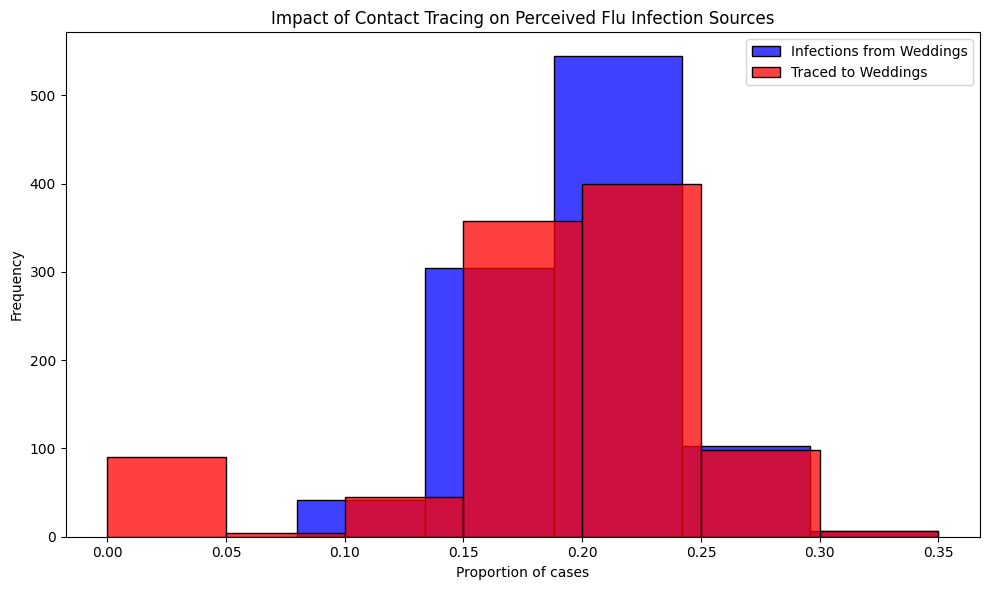

In [ ]:
#start with the default
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Note: Suppressing FutureWarnings to maintain a clean output. This is specifically to ignore warnings about
# deprecated features in the libraries we're using (e.g., 'use_inf_as_na' option in Pandas, used by Seaborn),
# which we currently have no direct control over. This action is taken to ensure that our output remains
# focused on relevant information, acknowledging that we rely on external library updates to fully resolve
# these deprecations. Always consider reviewing and removing this suppression after significant library updates.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Constants representing the parameters of the model
ATTACK_RATE = 0.10
TRACE_SUCCESS = 0.20
SECONDARY_TRACE_THRESHOLD = 2

def simulate_event(m):
  """
  Simulates the infection and tracing process for a series of events.
  
  This function creates a DataFrame representing individuals attending weddings and brunches,
  infects a subset of them based on the ATTACK_RATE, performs primary and secondary contact tracing,
  and calculates the proportions of infections and traced cases that are attributed to weddings.
  
  Parameters:
  - m: Dummy parameter for iteration purposes.
  
  Returns:
  - A tuple containing the proportion of infections and the proportion of traced cases
    that are attributed to weddings.
  """
  # Create DataFrame for people at events with initial infection and traced status
  events = ['wedding'] * 200 + ['brunch'] * 800
  ppl = pd.DataFrame({
      'event': events,
      'infected': False,
      'traced': np.nan  # Initially setting traced status as NaN
  })

  # Explicitly set 'traced' column to nullable boolean type
  ppl['traced'] = ppl['traced'].astype(pd.BooleanDtype())

  # Infect a random subset of people
  infected_indices = np.random.choice(ppl.index, size=int(len(ppl) * ATTACK_RATE), replace=False)
  ppl.loc[infected_indices, 'infected'] = True

  # Primary contact tracing: randomly decide which infected people get traced
  ppl.loc[ppl['infected'], 'traced'] = np.random.rand(sum(ppl['infected'])) < TRACE_SUCCESS

  # Secondary contact tracing based on event attendance
  event_trace_counts = ppl[ppl['traced'] == True]['event'].value_counts()
  events_traced = event_trace_counts[event_trace_counts >= SECONDARY_TRACE_THRESHOLD].index
  ppl.loc[ppl['event'].isin(events_traced) & ppl['infected'], 'traced'] = True

  # Calculate proportions of infections and traces attributed to each event type
  ppl['event_type'] = ppl['event'].str[0]  # 'w' for wedding, 'b' for brunch
  wedding_infections = sum(ppl['infected'] & (ppl['event_type'] == 'w'))
  brunch_infections = sum(ppl['infected'] & (ppl['event_type'] == 'b'))
  p_wedding_infections = wedding_infections / (wedding_infections + brunch_infections)

  wedding_traces = sum(ppl['infected'] & ppl['traced'] & (ppl['event_type'] == 'w'))
  brunch_traces = sum(ppl['infected'] & ppl['traced'] & (ppl['event_type'] == 'b'))
  p_wedding_traces = wedding_traces / (wedding_traces + brunch_traces)

  return p_wedding_infections, p_wedding_traces

# Run the simulation 1000 times
results = [simulate_event(m) for m in range(1000)]
props_df = pd.DataFrame(results, columns=["Infections", "Traces"])

# Plotting the results
plt.figure(figsize=(10, 6))
sns.histplot(props_df['Infections'], color="blue", alpha=0.75, binwidth=0.05, kde=False, label='Infections from Weddings')
sns.histplot(props_df['Traces'], color="red", alpha=0.75, binwidth=0.05, kde=False, label='Traced to Weddings')
plt.xlabel("Proportion of cases")
plt.ylabel("Frequency")
plt.title("Impact of Contact Tracing on Perceived Flu Infection Sources")
plt.legend()
plt.tight_layout()
plt.show()


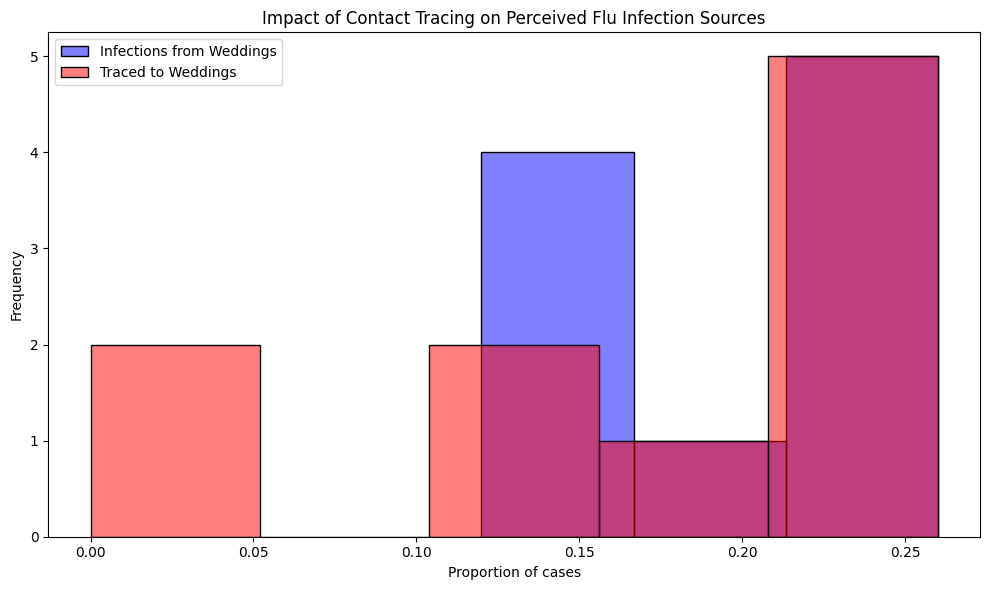

In [38]:
#try 10 a few times
results = [simulate_event(m) for m in range(10)]
props_df = pd.DataFrame(results, columns=["Infections", "Traces"])


# Plotting the results
plt.figure(figsize=(10, 6))
sns.histplot(props_df['Infections'], color="blue", alpha=0.5, binwidth=0.05, kde=False, label='Infections from Weddings')
sns.histplot(props_df['Traces'], color="red", alpha=0.5, binwidth=0.05, kde=False, label='Traced to Weddings')
plt.xlabel("Proportion of cases")
plt.ylabel("Frequency")
plt.title("Impact of Contact Tracing on Perceived Flu Infection Sources")
plt.legend()
plt.tight_layout()
plt.show()

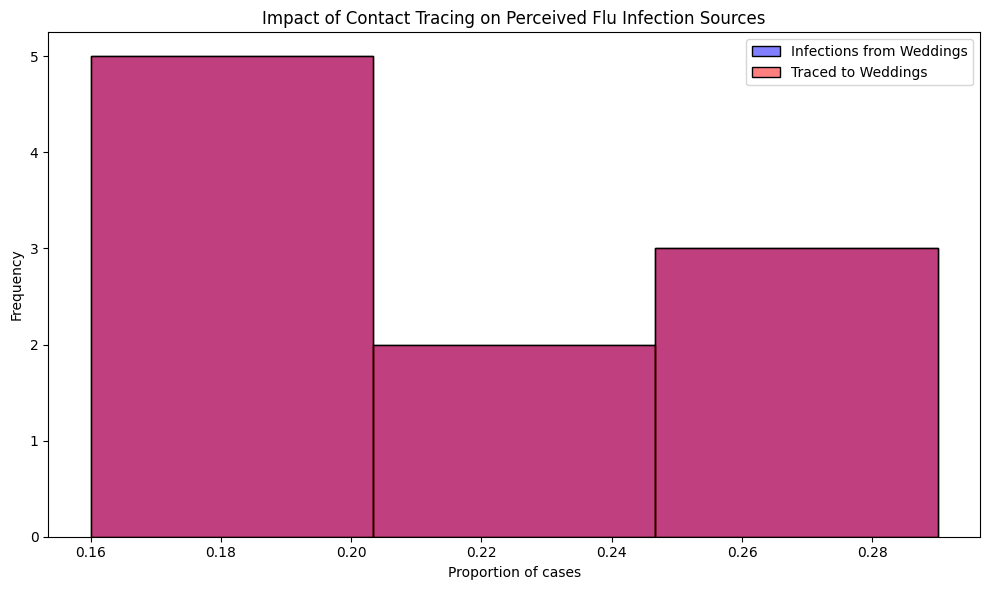

In [39]:
#try 10 a few times
results = [simulate_event(m) for m in range(10)]
props_df = pd.DataFrame(results, columns=["Infections", "Traces"])


# Plotting the results
plt.figure(figsize=(10, 6))
sns.histplot(props_df['Infections'], color="blue", alpha=0.5, binwidth=0.05, kde=False, label='Infections from Weddings')
sns.histplot(props_df['Traces'], color="red", alpha=0.5, binwidth=0.05, kde=False, label='Traced to Weddings')
plt.xlabel("Proportion of cases")
plt.ylabel("Frequency")
plt.title("Impact of Contact Tracing on Perceived Flu Infection Sources")
plt.legend()
plt.tight_layout()
plt.show()

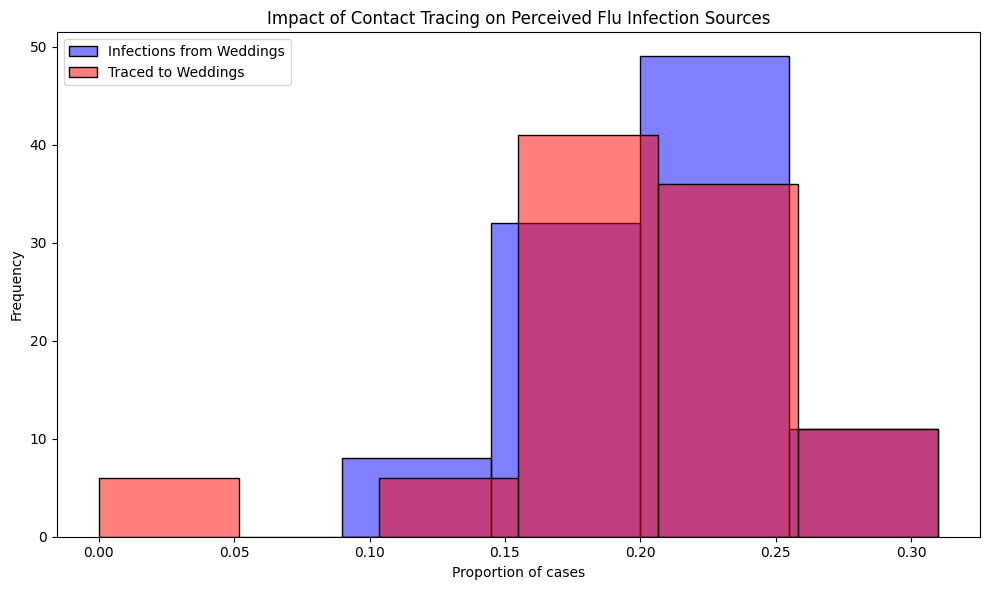

In [40]:
#now 100
results = [simulate_event(m) for m in range(100)]
props_df = pd.DataFrame(results, columns=["Infections", "Traces"])


# Plotting the results
plt.figure(figsize=(10, 6))
sns.histplot(props_df['Infections'], color="blue", alpha=0.5, binwidth=0.05, kde=False, label='Infections from Weddings')
sns.histplot(props_df['Traces'], color="red", alpha=0.5, binwidth=0.05, kde=False, label='Traced to Weddings')
plt.xlabel("Proportion of cases")
plt.ylabel("Frequency")
plt.title("Impact of Contact Tracing on Perceived Flu Infection Sources")
plt.legend()
plt.tight_layout()
plt.show()

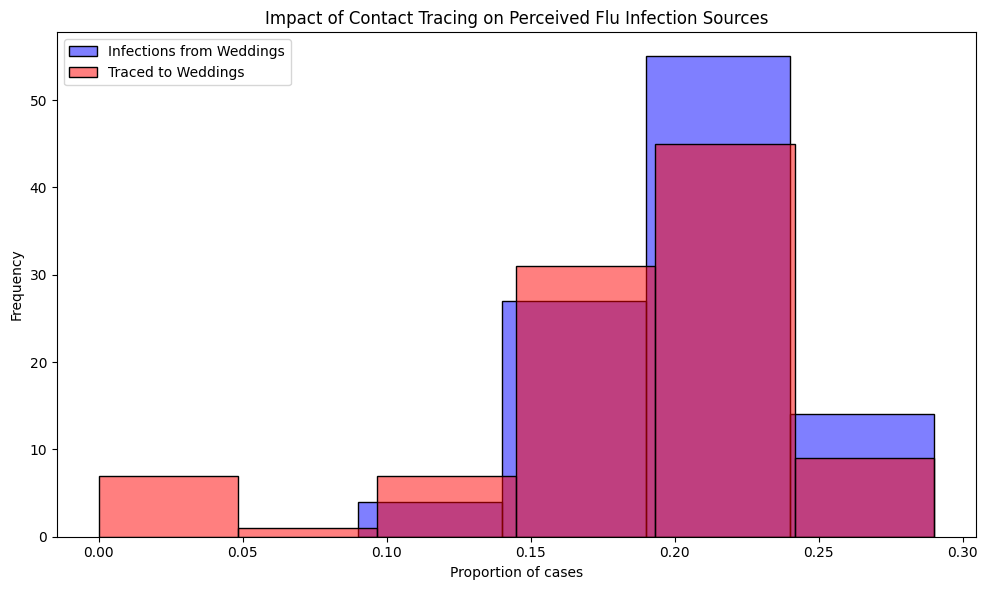

In [41]:
results = [simulate_event(m) for m in range(100)]
props_df = pd.DataFrame(results, columns=["Infections", "Traces"])


# Plotting the results
plt.figure(figsize=(10, 6))
sns.histplot(props_df['Infections'], color="blue", alpha=0.5, binwidth=0.05, kde=False, label='Infections from Weddings')
sns.histplot(props_df['Traces'], color="red", alpha=0.5, binwidth=0.05, kde=False, label='Traced to Weddings')
plt.xlabel("Proportion of cases")
plt.ylabel("Frequency")
plt.title("Impact of Contact Tracing on Perceived Flu Infection Sources")
plt.legend()
plt.tight_layout()
plt.show()

> So, this code is not reproducible in the sense that between each time I run it, with the same syntax, it is not the same. This is because there is a degree of randomness involved in the primary contact tracing (the 20% coinflip of if it is successful or not for those infected).

Alter the code so that it is reproducible. Describe the changes you made to the code and how they affected the reproducibility of the script. The script needs to produce the same output when run multiple times.

> To make this code reproducible, we just have to set a seed!

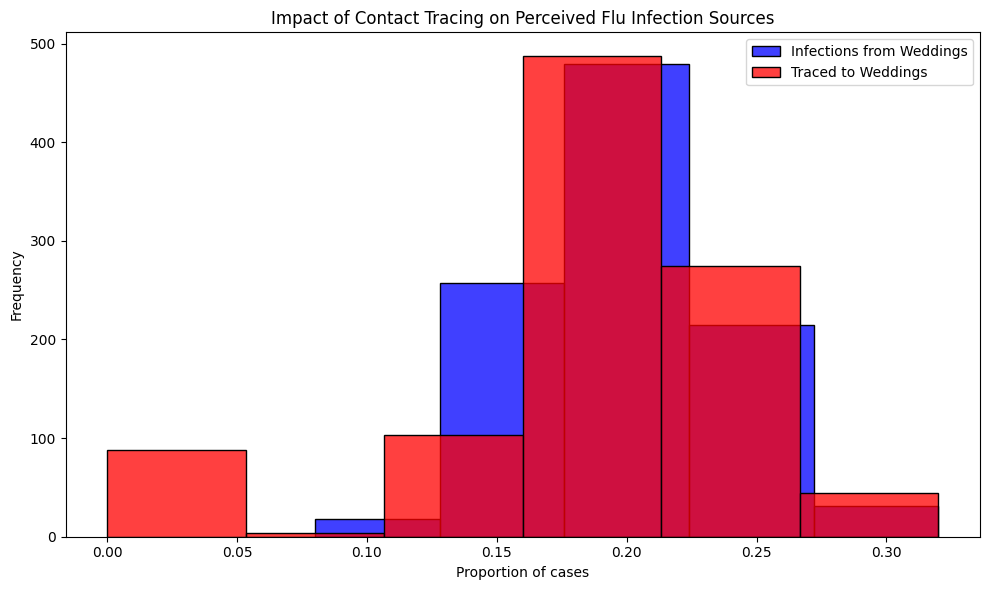

In [ ]:
#start with the default
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Note: Suppressing FutureWarnings to maintain a clean output. This is specifically to ignore warnings about
# deprecated features in the libraries we're using (e.g., 'use_inf_as_na' option in Pandas, used by Seaborn),
# which we currently have no direct control over. This action is taken to ensure that our output remains
# focused on relevant information, acknowledging that we rely on external library updates to fully resolve
# these deprecations. Always consider reviewing and removing this suppression after significant library updates.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Constants representing the parameters of the model
np.random.seed(10101) # <- set a seed here
ATTACK_RATE = 0.10
TRACE_SUCCESS = 0.20
SECONDARY_TRACE_THRESHOLD = 2

def simulate_event(m):
  """
  Simulates the infection and tracing process for a series of events.
  
  This function creates a DataFrame representing individuals attending weddings and brunches,
  infects a subset of them based on the ATTACK_RATE, performs primary and secondary contact tracing,
  and calculates the proportions of infections and traced cases that are attributed to weddings.
  
  Parameters:
  - m: Dummy parameter for iteration purposes.
  
  Returns:
  - A tuple containing the proportion of infections and the proportion of traced cases
    that are attributed to weddings.
  """
  # Create DataFrame for people at events with initial infection and traced status
  events = ['wedding'] * 200 + ['brunch'] * 800
  ppl = pd.DataFrame({
      'event': events,
      'infected': False,
      'traced': np.nan  # Initially setting traced status as NaN
  })

  # Explicitly set 'traced' column to nullable boolean type
  ppl['traced'] = ppl['traced'].astype(pd.BooleanDtype())

  # Infect a random subset of people
  infected_indices = np.random.choice(ppl.index, size=int(len(ppl) * ATTACK_RATE), replace=False)
  ppl.loc[infected_indices, 'infected'] = True

  # Primary contact tracing: randomly decide which infected people get traced
  ppl.loc[ppl['infected'], 'traced'] = np.random.rand(sum(ppl['infected'])) < TRACE_SUCCESS

  # Secondary contact tracing based on event attendance
  event_trace_counts = ppl[ppl['traced'] == True]['event'].value_counts()
  events_traced = event_trace_counts[event_trace_counts >= SECONDARY_TRACE_THRESHOLD].index
  ppl.loc[ppl['event'].isin(events_traced) & ppl['infected'], 'traced'] = True

  # Calculate proportions of infections and traces attributed to each event type
  ppl['event_type'] = ppl['event'].str[0]  # 'w' for wedding, 'b' for brunch
  wedding_infections = sum(ppl['infected'] & (ppl['event_type'] == 'w'))
  brunch_infections = sum(ppl['infected'] & (ppl['event_type'] == 'b'))
  p_wedding_infections = wedding_infections / (wedding_infections + brunch_infections)

  wedding_traces = sum(ppl['infected'] & ppl['traced'] & (ppl['event_type'] == 'w'))
  brunch_traces = sum(ppl['infected'] & ppl['traced'] & (ppl['event_type'] == 'b'))
  p_wedding_traces = wedding_traces / (wedding_traces + brunch_traces)

  return p_wedding_infections, p_wedding_traces

# Run the simulation 1000 times
results = [simulate_event(m) for m in range(1000)]
props_df = pd.DataFrame(results, columns=["Infections", "Traces"])

# Plotting the results
plt.figure(figsize=(10, 6))
sns.histplot(props_df['Infections'], color="blue", alpha=0.75, binwidth=0.05, kde=False, label='Infections from Weddings')
sns.histplot(props_df['Traces'], color="red", alpha=0.75, binwidth=0.05, kde=False, label='Traced to Weddings')
plt.xlabel("Proportion of cases")
plt.ylabel("Frequency")
plt.title("Impact of Contact Tracing on Perceived Flu Infection Sources")
plt.legend()
plt.tight_layout()
plt.show()


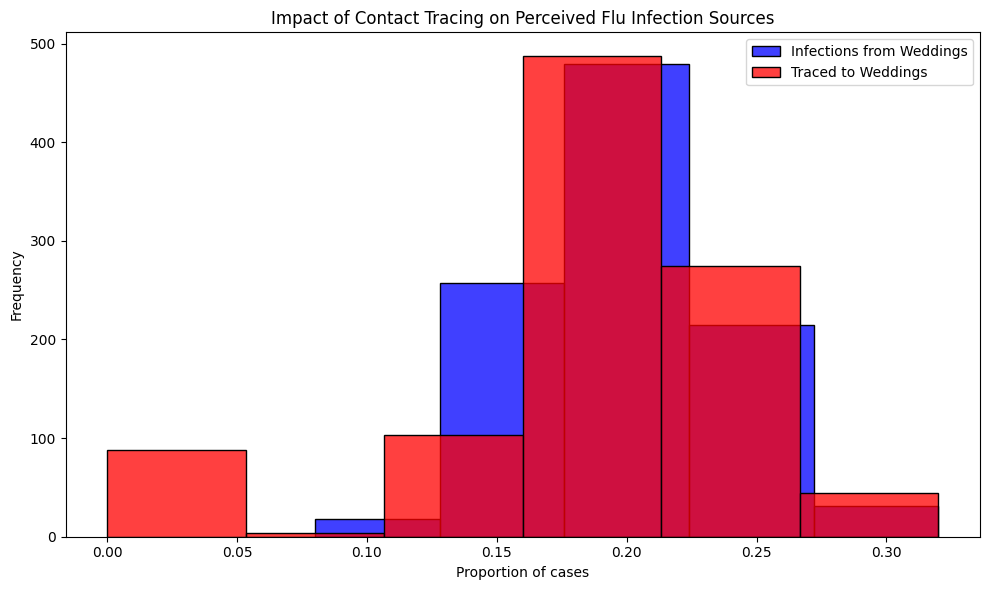

In [44]:
# Run the simulation 1000 times
np.random.seed(10101)
results = [simulate_event(m) for m in range(1000)]
props_df = pd.DataFrame(results, columns=["Infections", "Traces"])

# Plotting the results
plt.figure(figsize=(10, 6))
sns.histplot(props_df['Infections'], color="blue", alpha=0.75, binwidth=0.05, kde=False, label='Infections from Weddings')
sns.histplot(props_df['Traces'], color="red", alpha=0.75, binwidth=0.05, kde=False, label='Traced to Weddings')
plt.xlabel("Proportion of cases")
plt.ylabel("Frequency")
plt.title("Impact of Contact Tracing on Perceived Flu Infection Sources")
plt.legend()
plt.tight_layout()
plt.show()


## Code

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Note: Suppressing FutureWarnings to maintain a clean output. This is specifically to ignore warnings about
# deprecated features in the libraries we're using (e.g., 'use_inf_as_na' option in Pandas, used by Seaborn),
# which we currently have no direct control over. This action is taken to ensure that our output remains
# focused on relevant information, acknowledging that we rely on external library updates to fully resolve
# these deprecations. Always consider reviewing and removing this suppression after significant library updates.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Constants representing the parameters of the model
ATTACK_RATE = 0.10
TRACE_SUCCESS = 0.20
SECONDARY_TRACE_THRESHOLD = 2

In [5]:
#create some code here to break down what is happening
events = ['wedding'] * 200 + ['brunch'] * 800
print(events)

['wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding', 'wedding'

In [7]:
ppl = pd.DataFrame({
      'event': events,
      'infected': False,
      'traced': np.nan  # Initially setting traced status as NaN
  })
print(ppl)

       event  infected  traced
0    wedding     False     NaN
1    wedding     False     NaN
2    wedding     False     NaN
3    wedding     False     NaN
4    wedding     False     NaN
..       ...       ...     ...
995   brunch     False     NaN
996   brunch     False     NaN
997   brunch     False     NaN
998   brunch     False     NaN
999   brunch     False     NaN

[1000 rows x 3 columns]


In [11]:
ppl['traced'] = ppl['traced'].astype(pd.BooleanDtype())

  # Infect a random subset of people
infected_indices = np.random.choice(ppl.index, size=int(len(ppl) * ATTACK_RATE), replace=False)
ppl.loc[infected_indices, 'infected'] = True

print(ppl)


       event  infected  traced
0    wedding      True    True
1    wedding     False    <NA>
2    wedding     False    <NA>
3    wedding     False    <NA>
4    wedding     False    <NA>
..       ...       ...     ...
995   brunch     False    <NA>
996   brunch      True    True
997   brunch     False    <NA>
998   brunch     False    <NA>
999   brunch     False    <NA>

[1000 rows x 3 columns]


In [ ]:

# Primary contact tracing: randomly decide which infected people get traced
ppl.loc[ppl['infected'], 'traced'] = np.random.rand(sum(ppl['infected'])) < TRACE_SUCCESS
print(ppl.to_string())
#this is a random selection step for everything over the entire dataframe

       event  infected  traced
0    wedding      True    True
1    wedding     False    <NA>
2    wedding     False    <NA>
3    wedding     False    <NA>
4    wedding     False    <NA>
5    wedding     False    <NA>
6    wedding     False    <NA>
7    wedding     False    <NA>
8    wedding      True    True
9    wedding     False    <NA>
10   wedding     False    <NA>
11   wedding     False    <NA>
12   wedding     False    <NA>
13   wedding      True   False
14   wedding      True   False
15   wedding     False    <NA>
16   wedding      True   False
17   wedding     False    <NA>
18   wedding      True    True
19   wedding      True    True
20   wedding     False    <NA>
21   wedding     False    <NA>
22   wedding     False    <NA>
23   wedding      True    True
24   wedding     False    <NA>
25   wedding     False    <NA>
26   wedding     False    <NA>
27   wedding      True   False
28   wedding     False    <NA>
29   wedding     False    <NA>
30   wedding     False    <NA>
31   wed

In [ ]:

  # Secondary contact tracing based on event attendance
event_trace_counts = ppl[ppl['traced'] == True]['event'].value_counts()
print(event_trace_counts)
#this is basically summarizing how many infections were at each event based on *successful tracing*

event
brunch     36
wedding     6
Name: count, dtype: int64


In [ ]:

events_traced = event_trace_counts[event_trace_counts >= SECONDARY_TRACE_THRESHOLD].index
print(events_traced)
#this is saying, if an event has more than 2 traced infections, then we do secondary traces

Index(['brunch', 'wedding'], dtype='object', name='event')


In [ ]:

ppl.loc[ppl['event'].isin(events_traced) & ppl['infected'], 'traced'] = True
print(ppl.to_string())
#if we then test everyone who went to a certain event, then the traced should be pretty much equal to the true number of infections

       event  infected  traced
0    wedding      True    True
1    wedding     False    <NA>
2    wedding     False    <NA>
3    wedding     False    <NA>
4    wedding     False    <NA>
5    wedding     False    <NA>
6    wedding     False    <NA>
7    wedding     False    <NA>
8    wedding      True    True
9    wedding     False    <NA>
10   wedding     False    <NA>
11   wedding     False    <NA>
12   wedding     False    <NA>
13   wedding      True    True
14   wedding      True    True
15   wedding     False    <NA>
16   wedding      True    True
17   wedding     False    <NA>
18   wedding      True    True
19   wedding      True    True
20   wedding     False    <NA>
21   wedding     False    <NA>
22   wedding     False    <NA>
23   wedding      True    True
24   wedding     False    <NA>
25   wedding     False    <NA>
26   wedding     False    <NA>
27   wedding      True    True
28   wedding     False    <NA>
29   wedding     False    <NA>
30   wedding     False    <NA>
31   wed

In [ ]:
ppl['event_type'] = ppl['event'].str[0]  # 'w' for wedding, 'b' for brunch
wedding_infections = sum(ppl['infected'] & (ppl['event_type'] == 'w'))
brunch_infections = sum(ppl['infected'] & (ppl['event_type'] == 'b'))
p_wedding_infections = wedding_infections / (wedding_infections + brunch_infections)
print(p_wedding_infections)
#now we summarize the proportion of infections attributed to weddings over all observed, traced, infections

0.24324324324324326


In [25]:

def simulate_event(m):
  """
  Simulates the infection and tracing process for a series of events.
  
  This function creates a DataFrame representing individuals attending weddings and brunches,
  infects a subset of them based on the ATTACK_RATE, performs primary and secondary contact tracing,
  and calculates the proportions of infections and traced cases that are attributed to weddings.
  
  Parameters:
  - m: Dummy parameter for iteration purposes.
  
  Returns:
  - A tuple containing the proportion of infections and the proportion of traced cases
    that are attributed to weddings.
  """
  # Create DataFrame for people at events with initial infection and traced status
  events = ['wedding'] * 200 + ['brunch'] * 800
  ppl = pd.DataFrame({
      'event': events,
      'infected': False,
      'traced': np.nan  # Initially setting traced status as NaN
  })

  # Explicitly set 'traced' column to nullable boolean type
  ppl['traced'] = ppl['traced'].astype(pd.BooleanDtype())

  # Infect a random subset of people
  infected_indices = np.random.choice(ppl.index, size=int(len(ppl) * ATTACK_RATE), replace=False)
  ppl.loc[infected_indices, 'infected'] = True

  # Primary contact tracing: randomly decide which infected people get traced
  ppl.loc[ppl['infected'], 'traced'] = np.random.rand(sum(ppl['infected'])) < TRACE_SUCCESS

  # Secondary contact tracing based on event attendance
  event_trace_counts = ppl[ppl['traced'] == True]['event'].value_counts()
  events_traced = event_trace_counts[event_trace_counts >= SECONDARY_TRACE_THRESHOLD].index
  ppl.loc[ppl['event'].isin(events_traced) & ppl['infected'], 'traced'] = True

  # Calculate proportions of infections and traces attributed to each event type
  ppl['event_type'] = ppl['event'].str[0]  # 'w' for wedding, 'b' for brunch
  wedding_infections = sum(ppl['infected'] & (ppl['event_type'] == 'w'))
  brunch_infections = sum(ppl['infected'] & (ppl['event_type'] == 'b'))
  p_wedding_infections = wedding_infections / (wedding_infections + brunch_infections)

  wedding_traces = sum(ppl['infected'] & ppl['traced'] & (ppl['event_type'] == 'w'))
  brunch_traces = sum(ppl['infected'] & ppl['traced'] & (ppl['event_type'] == 'b'))
  p_wedding_traces = wedding_traces / (wedding_traces + brunch_traces)

  return p_wedding_infections, p_wedding_traces

# Run the simulation 1000 times
results = [simulate_event(m) for m in range(1000)]
props_df = pd.DataFrame(results, columns=["Infections", "Traces"])


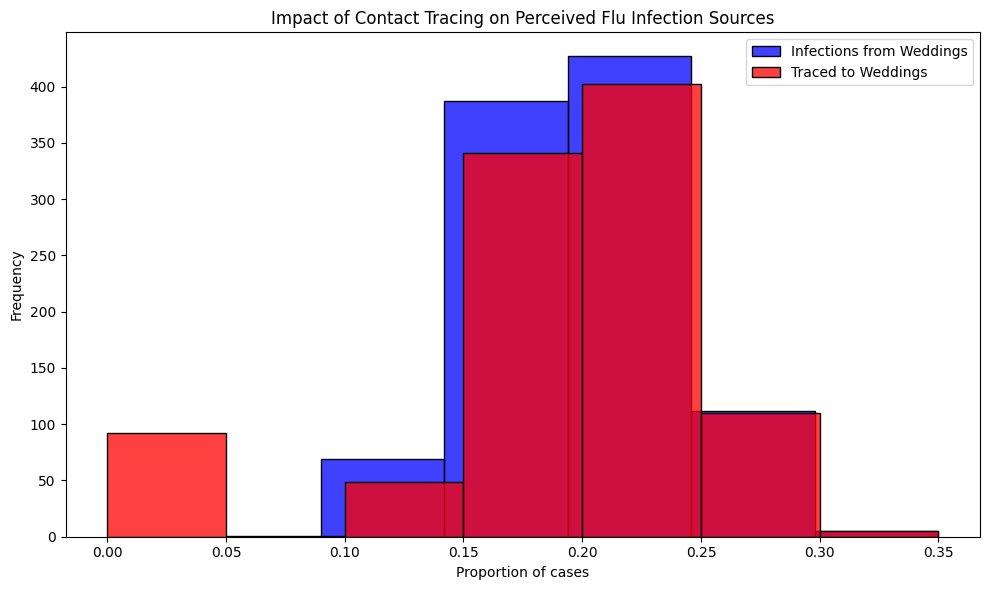

In [26]:

# Plotting the results
plt.figure(figsize=(10, 6))
sns.histplot(props_df['Infections'], color="blue", alpha=0.75, binwidth=0.05, kde=False, label='Infections from Weddings')
sns.histplot(props_df['Traces'], color="red", alpha=0.75, binwidth=0.05, kde=False, label='Traced to Weddings')
plt.xlabel("Proportion of cases")
plt.ylabel("Frequency")
plt.title("Impact of Contact Tracing on Perceived Flu Infection Sources")
plt.legend()
plt.tight_layout()
plt.show()

## Criteria

|Criteria|Complete|Incomplete|
|--------|----|----|
|Alteration of the code|The code changes made, made it reproducible.|The code is still not reproducible.|
|Description of changes|The author answered questions and explained the reasonings for the changes made well.|The author did not answer questions or explain the reasonings for the changes made well.|

## Submission Information
🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `23:59 - 06 January 2026`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This markdown file (`a1_sampling_and_reproducibility.ipynb`) should be populated with the code changed.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/sampling/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

#### Checklist:
- [ ] Create a branch called `assignment-1`.
- [ ] Ensure that the repository is public.
- [ ] Review [the PR description guidelines](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md#guidelines-for-pull-request-descriptions) and adhere to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via the help channel in Slack. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
